In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv('grades.csv')
df['submission_time'] = pd.to_datetime(df['submit_time'], format='%m/%d/%y-%H:%M:%S')
df.drop(columns=['submit_time'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   submission       198 non-null    object        
 1   submission_time  198 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 3.2+ KB


In [36]:
def getUrlParts(url):
    split = url.split('://')
    scheme = split[0]
    remaining = split[1]
    split = remaining.split('/')
    host = split[0]
    remaining = split[1:]
    path = '/'.join(split[1:-1])
    file = split[-1:][0]
    split = file.split('.')
    file_name = split[0]
    file_extension = split[1]
    return scheme, host, path, file, file_name, file_extension

In [38]:
url = 'https://google.com/foo/baz/bar.zip'
getUrlParts(url)

('https', 'google.com', 'foo/baz', 'bar.zip', 'bar', 'zip')

In [49]:
df[[
    'scheme',
    'host',
    'path',
    'file',
    'file_name',
    'file_extension'
]] = df['submission'].apply(lambda x: pd.Series(getUrlParts(x)))
df.drop(columns=['submission'], inplace=True)
df.head()

,submission_time,scheme,host,path,file,file_name,file_extension
0,2017-01-03 20:28:52,https,ckd.upgrad.com,UpGrad/73ba5189-94fd-44aa-88d3-6b36aaa69b02,DDA1610095.zip,DDA1610095,zip
1,2017-01-03 20:18:21,https,ckd.upgrad.com,UpGrad/185242ff-7508-4cc4-afa3-5865733ba1d4,DDA1610288.zip,DDA1610288,zip
2,2017-01-03 22:37:08,https,ckd.upgrad.com,UpGrad/a353d129-c100-4342-aa95-a7018ff93150,DDA1610106.zip,DDA1610106,zip
3,2017-01-02 21:43:19,https,ckd.upgrad.com,UpGrad/002fc912-faa1-4948-9358-fcdabfd7669c,DDA1610261.zip,DDA1610261,zip
4,2017-01-03 15:27:49,https,ckd.upgrad.com,UpGrad/25cbc4a4-6d49-4ffa-9bf1-06bdb1a7cf8f,DDA1610028.zip,DDA1610028,zip


In [56]:
df['file_extension'].value_counts()*100/df.shape[0]

file_extension
zip    95.454545
R       3.535354
7z      1.010101
Name: count, dtype: float64

In [59]:
import datetime as dt
soft_deadline = dt.datetime(2017, 1, 3, 23, 59, 59)
hard_deadline = dt.datetime(2017, 1, 9, 23, 59, 0)
print(soft_deadline)
print(hard_deadline)

2017-01-03 23:59:59
2017-01-09 23:59:00


In [61]:
row_condition = df['submission_time'] > soft_deadline
df[row_condition].shape

(44, 7)

In [62]:
df['submission_date'] = df['submission_time'].dt.date
df.head()

,submission_time,scheme,host,path,file,file_name,file_extension,submission_date
0,2017-01-03 20:28:52,https,ckd.upgrad.com,UpGrad/73ba5189-94fd-44aa-88d3-6b36aaa69b02,DDA1610095.zip,DDA1610095,zip,2017-01-03
1,2017-01-03 20:18:21,https,ckd.upgrad.com,UpGrad/185242ff-7508-4cc4-afa3-5865733ba1d4,DDA1610288.zip,DDA1610288,zip,2017-01-03
2,2017-01-03 22:37:08,https,ckd.upgrad.com,UpGrad/a353d129-c100-4342-aa95-a7018ff93150,DDA1610106.zip,DDA1610106,zip,2017-01-03
3,2017-01-02 21:43:19,https,ckd.upgrad.com,UpGrad/002fc912-faa1-4948-9358-fcdabfd7669c,DDA1610261.zip,DDA1610261,zip,2017-01-02
4,2017-01-03 15:27:49,https,ckd.upgrad.com,UpGrad/25cbc4a4-6d49-4ffa-9bf1-06bdb1a7cf8f,DDA1610028.zip,DDA1610028,zip,2017-01-03


In [63]:
df['submission_date'].value_counts()

submission_date
2017-01-03    120
2017-01-09     21
2017-01-02     14
2017-01-04     12
2016-12-30      6
2017-01-01      6
2017-01-08      3
2017-01-10      3
2016-12-29      2
2016-12-28      2
2017-01-07      2
2017-01-17      1
2017-02-03      1
2016-12-21      1
2017-01-06      1
2016-11-19      1
2016-12-31      1
2016-12-19      1
Name: count, dtype: int64

In [64]:
df['hour'] = df['submission_time'].dt.hour
df.head()

,submission_time,scheme,host,path,file,file_name,file_extension,submission_date,hour
0,2017-01-03 20:28:52,https,ckd.upgrad.com,UpGrad/73ba5189-94fd-44aa-88d3-6b36aaa69b02,DDA1610095.zip,DDA1610095,zip,2017-01-03,20
1,2017-01-03 20:18:21,https,ckd.upgrad.com,UpGrad/185242ff-7508-4cc4-afa3-5865733ba1d4,DDA1610288.zip,DDA1610288,zip,2017-01-03,20
2,2017-01-03 22:37:08,https,ckd.upgrad.com,UpGrad/a353d129-c100-4342-aa95-a7018ff93150,DDA1610106.zip,DDA1610106,zip,2017-01-03,22
3,2017-01-02 21:43:19,https,ckd.upgrad.com,UpGrad/002fc912-faa1-4948-9358-fcdabfd7669c,DDA1610261.zip,DDA1610261,zip,2017-01-02,21
4,2017-01-03 15:27:49,https,ckd.upgrad.com,UpGrad/25cbc4a4-6d49-4ffa-9bf1-06bdb1a7cf8f,DDA1610028.zip,DDA1610028,zip,2017-01-03,15


<Axes: ylabel='Frequency'>

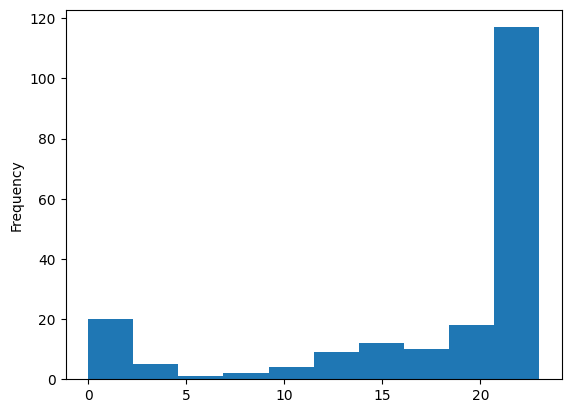

In [68]:
df['hour'].plot.hist()